# Partie 1- Etude sur les données de Références



## Téléchargement des données




In [4]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/claim_mapping.csv', header=None, sep=',')
new_header = df.iloc[0].fillna(df.columns.to_series())
df = df[1:]
df.columns = new_header

In [4]:
df.head()

,Annotations,Score,CR Author A,CR Author B,Review URL A,Review URL B,Text Fragments A,Text Fragments B,Entities A,Entities B,Keywords A,Keywords B,Citations A,Citations B,URI A,URI B
1,E,1.0600323698207732,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,David_Clarke_(sheriff);Chris_Abele;Chris_Abele,David_Clarke_(sheriff);Chris_Abele;Chris_Abele,NaN,NaN,http://www.cbs58.com/news/local-news/More-Bus-...,http://www.cbs58.com/news/local-news/More-Bus-...,http://data.gesis.org/claimskg/creative_work/3...,http://data.gesis.org/claimskg/creative_work/3...
2,E,1.0352840978838664,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,Chris_Abele;Scott_Walker_(politician);Scott_Wa...,Chris_Abele;Scott_Walker_(politician);Scott_Wa...,NaN,NaN,https://www.youtube.com/watch?v=Nkjmoht6RXo&fe...,https://www.youtube.com/watch?v=Nkjmoht6RXo&fe...,http://data.gesis.org/claimskg/creative_work/7...,http://data.gesis.org/claimskg/creative_work/7...
3,E,1.0317306315751822,politifact,politifact,http://www.politifact.com/wisconsin/statements...,http://www.politifact.com/wisconsin/statements...,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,Tom_Barrett_(Wisconsin_politician);Scott_Walke...,Tom_Barrett_(Wisconsin_politician);Scott_Walke...,NaN,NaN,"https://www.youtube.com/watch?v=PZOuufgoMFI, h...","https://www.youtube.com/watch?v=PZOuufgoMFI, h...",http://data.gesis.org/claimskg/creative_work/f...,http://data.gesis.org/claimskg/creative_work/f...
4,E*,1.015787087104142,politifact,politifact,http://www.politifact.com/truth-o-meter/statem...,http://www.politifact.com/truth-o-meter/statem...,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,Mitt_Romney;Barack_Obama;Hezbollah;Hamas;Iran;...,Barack_Obama;Paul_Ryan;Joe_Biden;Martha_Raddat...,NaN,NaN,http://www.fas.org/sgp/crs/mideast/RS20871.pdf...,"http://www.c-spanvideo.org/clip/4027905, http:...",http://data.gesis.org/claimskg/creative_work/f...,http://data.gesis.org/claimskg/creative_work/d...
5,ST,1.0157590702428527,politifact,politifact,http://www.politifact.com/truth-o-meter/statem...,http://www.politifact.com/truth-o-meter/statem...,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...",Newt_Gingrich;Freddie_Mac;Ron_Paul;Michele_Bac...,Freddie_Mac;Newt_Gingrich;PolitiFact;Governmen...,NaN,NaN,"http://www.nreca.coop/Pages/default.aspx, http...",https://www.politifact.com/truth-o-meter/state...,http://data.gesis.org/claimskg/creative_work/8...,http://data.gesis.org/claimskg/creative_work/8...


In [ ]:
df['Text Fragments A'][3]

'Tom Barrett says gubernatorial rival Scott Walker eliminated economic development office during recession'

In [ ]:
df['Text Fragments B'][3]

'Tom Barrett says gubernatorial rival Scott Walker eliminated economic development office during recession'

## Fonctions 

In [7]:
import numpy as np
def levenshtein_ratio_and_distance(s,t,ratio_calc=False):
  rows=len(s)+1
  cols=len(t)+1
  distance=np.zeros((rows,cols), dtype=int)

  for i in range(1,rows):
    for k in range(1,cols):
      distance[i][0]=i
      distance[0][k]=k

  for col in range(1, cols):
    for row in range(1, rows):
      if s[row-1]==t[col-1]:
        cost=0
      else:
        if ratio_calc==True:
          cost=2
        else:
          cost=1
      distance[row][col]=min(distance[row-1][col]+1,
                           distance[row][col-1]+1,
                           distance[row-1][col-1]+cost)
    
  if ratio_calc==True:
    Ratio=((len(s)+len(t))-distance[row][col])/(len(s)+len(t))
    return Ratio
  else:
    return format(distance[row][col])

In [8]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [9]:
def lcs(X, Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)
  
    # declaring the array for storing the dp values
    L = [[None]*(n + 1) for i in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
    return L[m][n]

## Traitement des données

Visualisation des données références avec levenshtein

---



### E= même texte même auteur 

In [ ]:
s1=df['Text Fragments A'][1]
s2=df['Text Fragments B'][1]
s3=df['Annotations'][1]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

1.0 0 E


Si correpondance Exacte on a Ratio = 1 ET Distance = 0 

In [ ]:
s1=df['Text Fragments A'][2]
s2=df['Text Fragments B'][2]
s3=df['Annotations'][2]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

1.0 0 E


In [ ]:
df['Entities A']

1         David_Clarke_(sheriff);Chris_Abele;Chris_Abele
2      Chris_Abele;Scott_Walker_(politician);Scott_Wa...
3      Tom_Barrett_(Wisconsin_politician);Scott_Walke...
4      Mitt_Romney;Barack_Obama;Hezbollah;Hamas;Iran;...
5      Newt_Gingrich;Freddie_Mac;Ron_Paul;Michele_Bac...
                             ...                        
580    Scott_Walker_(politician);Brett_Hulsey;Jim_Doy...
581    Scott_Walker_(politician);Renewable_Fuel_Stand...
582    U.S._News_&amp;_World_Report;Scott_Walker_(pol...
583    Mark_Twain;John_Robitaille;PolitiFact;Andrew_B...
584    Gina_Raimondo;Angel_Taveras;PolitiFact;PolitiF...
Name: Entities A, Length: 584, dtype: object

In [ ]:
df['Entities B'][1]

'David_Clarke_(sheriff);Chris_Abele;Chris_Abele'

In [ ]:
s1=df['Entities A'][1]
s2=df['Entities B'][1]
s3=df['Annotations'][1]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

1.0 0 E


On a Ratio = 1 et distance = 0 pour les auteurs pareil

Jaccard

---



In [ ]:
s1=df['Text Fragments A'][1]
s2=df['Text Fragments B'][1]
s3=df['Annotations'][1]

jaccard(s1,s2),s3

(1.0, 'E')

In [ ]:
s1=df['Text Fragments A'][2]
s2=df['Text Fragments B'][2]
s3=df['Annotations'][2]

jaccard(s1,s2),s3

(1.0, 'E')

LCS

In [19]:
s1=df['Text Fragments A'][1]
s2=df['Text Fragments B'][1]
s3=df['Annotations'][1]
lcs=lcs(s1,s2)
print(lcs,s3)

100 E


In [22]:
s1=df['Text Fragments A'][2]
s2=df['Text Fragments B'][2]
s3=df['Annotations'][2]
lcs=lcs(s1,s2)
print(lcs,s3)

88 E


### E*= meme texte pas meme auteur 


In [ ]:
s1=df['Text Fragments A'][4]
s2=df['Text Fragments B'][4]
s3=df['Annotations'][4]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

s1=df['Entities A'][4]
s2=df['Entities B'][4]
s3=df['Annotations'][4]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.5348837209302325 55 E*
0.7122040072859745 261 E*


In [ ]:
s1=df['Text Fragments A'][11]
s2=df['Text Fragments B'][11]
s3=df['Annotations'][11]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

s1=df['Entities A'][11]
s2=df['Entities B'][11]
s3=df['Annotations'][11]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.48484848484848486 59 E*
0.8920521945432978 64 E*


In [ ]:
s1=df['Text Fragments A'][13]
s2=df['Text Fragments B'][13]
s3=df['Annotations'][13]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

s1=df['Entities A'][13]
s2=df['Entities B'][13]
s3=df['Annotations'][13]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.7339449541284404 22 E*
0.8963855421686747 43 E*


In [ ]:
s1=df['Text Fragments A'][16]
s2=df['Text Fragments B'][16]
s3=df['Annotations'][16]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

s1=df['Entities A'][16]
s2=df['Entities B'][16]
s3=df['Annotations'][16]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.6835443037974683 24 E*
0.8964732650739476 76 E*


Jaccard

---



In [ ]:
s1=df['Text Fragments A'][4]
s2=df['Text Fragments B'][4]
s3=df['Annotations'][4]

jaccard(s1,s2),s3

(0.6363636363636364, 'E*')

In [ ]:
s1=df['Text Fragments A'][11]
s2=df['Text Fragments B'][11]
s3=df['Annotations'][11]

jaccard(s1,s2),s3

(0.5897435897435898, 'E*')

LCS

---



In [15]:
df['Text Fragments B'][5]

'Gingrich repeats claim that Freddie Mac, credit unions are ‘government-sponsored enterprises’'

In [27]:
s1=df['Text Fragments A'][4]
s2=df['Text Fragments B'][4]
s3=df['Annotations'][4]
lcs=lcs(s1,s2)
print(lcs,s3)

46 E*


In [29]:
s1=df['Text Fragments A'][11]
s2=df['Text Fragments B'][11]
s3=df['Annotations'][11]
lcs=lcs(s1,s2)
print(lcs,s3)

40 E*


### ST= même sujet

In [ ]:
s1=df['Text Fragments A'][5]
s2=df['Text Fragments B'][5]
s3=df['Annotations'][5]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)



0.5434782608695652 63 ST


In [ ]:
s1=df['Text Fragments A'][6]
s2=df['Text Fragments B'][6]
s3=df['Annotations'][6]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.6197183098591549 48 ST


In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.5032258064516129 56 ST


In [ ]:
s1=df['Text Fragments A'][7]
s2=df['Text Fragments B'][7]
s3=df['Annotations'][7]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.3247863247863248 54 ST


In [ ]:
s1=df['Text Fragments A'][23]
s2=df['Text Fragments B'][23]
s3=df['Annotations'][23]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.7936507936507936 19 ST


On passe à l'utilisation de Jaccard en comparaison les resultats avec deux textes qui n'ont aucun rapport

---



In [ ]:
s1=df['Text Fragments A'][5]
s2=df['Text Fragments B'][5]
s3=df['Annotations'][5]

jaccard(s1,s2),s3

(0.7586206896551724, 'ST')

In [ ]:
s1=df['Text Fragments A'][6]
s2=df['Text Fragments B'][6]
s3=df['Annotations'][6]

jaccard(s1,s2),s3

(0.8, 'ST')

In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]

jaccard(s1,s2),s3

(0.68, 'ST')

Calcul avec la plus grande sous sequence 

---



In [32]:
s1=df['Text Fragments A'][5]
s2=df['Text Fragments B'][5]
s3=df['Annotations'][5]


lcs(s1,s2),s3

(50, 'ST')

In [34]:
s1=df['Text Fragments A'][6]
s2=df['Text Fragments B'][6]
s3=df['Annotations'][6]


lcs(s1,s2),s3

(44, 'ST')

In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]


lcs(s1,s2),s3

(39, 'ST')

### N=

In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.5130434782608696 89 N


In [ ]:
s1=df['Text Fragments A'][258]
s2=df['Text Fragments B'][258]
s3=df['Annotations'][258]
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
print(Ratio,Distance,s3)

0.4095238095238095 83 N


Calcul avec Jaccard

---



In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]

jaccard(s1,s2),s3

(0.7714285714285715, 'N')

In [ ]:
s1=df['Text Fragments A'][258]
s2=df['Text Fragments B'][258]
s3=df['Annotations'][258]

jaccard(s1,s2),s3

(0.5945945945945946, 'N')

Calcul avec la plus grande sous sequence 

---



In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]


lcs(s1,s2),s3

(59, 'N')

In [ ]:
s1=df['Text Fragments A'][258]
s2=df['Text Fragments B'][258]
s3=df['Annotations'][258]


lcs(s1,s2),s3

(43, 'N')

## "Allègement" du texte brut 

### Mot inutile

On passe à la suppression des mots inutiles 



---




In [2]:
def modif(a):
  compter=0
  characters = "\'\""
  determinant=[" the ", " a ",  " of ", " this ", " these " ," my ", " his ", " your ", " to ", " in ", " for ", " with "," or "," and "," for "," not "," yet "," so "," but "," an "," her "," your "," these "," that "," those "," if "," since "," although ", " as ", " because ", " before ", " after ", " how ", " if ", " once ", " though ", " than ", " that ", " till ", " until ", " when ", " where ", " while "," he "," she "," you "," I "," you ", " our ", " we "," they " ] 
  Determinant=["The ", "A ",  "Of ", "This ", "These " ,"My ", "His ", "Your ", "To ", "In ", "For ", "With ","Or ","And ","For ","Not ","Yet ","So ","But ","An ","Her ","Your ","These ","That ","Those ","If ","Since ","Although ", "As ", "Because ", "Before ", "After ", "How ", "Once ", "Though ", "Than ", "That ", "Till ", "Until ", "When ", "Where ", "While "] 
  for x in range(len(characters)):
     a = a.replace(characters[x],"")
  for x in range(len(determinant)):
     a = a.replace(determinant[x]," ")
  for i in a:
   return a

In [ ]:
df['Text Fragments A'][15]

'Hillary Clinton says she helped usher Iran to the negotiating table'

In [ ]:
modif(df['Text Fragments A'][15])

'Hillary Clinton says helped usher Iran negotiating table'

On teste maintenat jaccard sans les mots inutiles

---



In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]

s1= modif(s1)
s2=modif(s2)
jaccard(s1,s2),s3

(0.7083333333333334, 'ST')

In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]

s1= modif(s1)
s2=modif(s2)
jaccard(s1,s2),s3

(0.7142857142857143, 'N')

Résultat non concluant 


On passe avec levenshtein sans les mots inutile

---



In [ ]:
s1=df['Text Fragments A'][342]
s2=df['Text Fragments B'][342]
s3=df['Annotations'][15]

s1= modif(s1)
s2=modif(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.45714285714285713 62 ST


In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]

s1= modif(s1)
s2=modif(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.5333333333333333 48 ST


In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]

s1= modif(s1)
s2=modif(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.5454545454545454 69 N


In [ ]:
s1=df['Text Fragments A'][7]
s2=df['Text Fragments B'][7]
s3=df['Annotations'][7]

s1= modif(s1)
s2=modif(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.3247863247863248 54 ST


In [ ]:
s1=df['Text Fragments A'][23]
s2=df['Text Fragments B'][23]
s3=df['Annotations'][23]

s1= modif(s1)
s2=modif(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.819672131147541 15 ST


LCS sans les mots inutiles

---



In [ ]:
s1=df['Text Fragments A'][23]
s2=df['Text Fragments B'][23]
s3=df['Annotations'][23]

s1=modif(s1)
s2=modif(s2)

lcs(s1,s2),s3

(50, 'ST')

In [ ]:
s1=df['Text Fragments A'][15]
s2=df['Text Fragments B'][15]
s3=df['Annotations'][15]

s1=modif(s1)
s2=modif(s2)

lcs(s1,s2),s3

(36, 'ST')

In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]

s1=modif(s1)
s2=modif(s2)

lcs(s1,s2),s3

(54, 'N')

Pour l'instant résultat pas très concluant

### Noms Propres

Reflexion autour des Noms Propres ( majuscule) pour une comparaison

---



In [ ]:
df['Text Fragments A'][255]

'U. S. Rep. David Cicilline says that when he was mayor of Providence, the city’s internal auditor was not blocked from accessing financial records'

In [ ]:
df['Text Fragments B'][45]

'Alan Grayson says more Walmart employees on Medicaid, food stamps than other companies'

In [10]:
def NomsPropres(a):
  compter=0
  a= a.split()
  b=[]
  string=''
  for x in a : 
      if x[0].isupper(): 
        b.append(x)
  for x in b: 
    string += ' ' + x
  return string

In [ ]:
NomsPropres(df['Text Fragments B'][23]),df['Annotations'][23]

(' FALSE: Attack Tony Thurmond ACLU’', 'ST')

In [ ]:
NomsPropres(df['Text Fragments A'][23]),df['Annotations'][23]

(' FALSE: Attack Tony Thurmond Obama', 'ST')

In [ ]:
NomsPropres(df['Text Fragments B'][7]),df['Annotations'][7]

(' Has The Uranium One Controversy Been', 'ST')

In [ ]:
NomsPropres(df['Text Fragments A'][7]),df['Annotations'][7]

(' MSNBC Host Fact Checks Clinton Foundation Theory’', 'ST')

In [ ]:
NomsPropres(df['Text Fragments A'][255]),df['Annotations'][255]

(' U. S. Rep. David Cicilline Providence,', 'N')

In [ ]:
NomsPropres(df['Text Fragments B'][255]),df['Annotations'][255]

(' U.S. Rep. David Cicilline United States', 'N')

On peut essayer de faire un levenshtein entre les Noms Propres 

---



In [ ]:
s1=df['Text Fragments A'][7]
s2=df['Text Fragments B'][7]
s3=df['Annotations'][7]

s1= NomsPropres(s1)
s2=NomsPropres(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.39080459770114945 40 ST


In [ ]:
s1=df['Text Fragments A'][13]
s2=df['Text Fragments B'][13]
s3=df['Annotations'][4]

s1= NomsPropres(s1)
s2=NomsPropres(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.6341463414634146 12 E*


In [ ]:
s1=df['Text Fragments A'][342]
s2=df['Text Fragments B'][342]
s3=df['Annotations'][340]

s1= NomsPropres(s1)
s2=NomsPropres(s2)
Distance=levenshtein_ratio_and_distance(s1,s2)
Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)

print(Ratio,Distance,s3)

0.7450980392156863 12 N


## Création Fonction

Calcul des similitudes selon un programme "simple"

---



In [ ]:
def similitude(a, b):
  compter=0
  characters = "\'\""
  for x in range(len(characters)):
    a = a.replace(characters[x],"")
    b = b.replace(characters[x],"")
 #couper toutes les partie en caractèere 
  a= a.split()
  b=b.split()
  for x in a:
      for y in b:
            if x == y:
                 compter=compter+1
      
 
       
  return compter

In [ ]:
s1=df['Text Fragments A'][23]
s2=df['Text Fragments B'][23]
s3=df['Annotations'][23]


similitude(s1,s2),s3

(8, 'ST')

In [ ]:
s1=df['Text Fragments A'][7]
s2=df['Text Fragments B'][7]
s3=df['Annotations'][7]


similitude(s1,s2),s3

(0, 'ST')

In [ ]:
s1=df['Text Fragments A'][255]
s2=df['Text Fragments B'][255]
s3=df['Annotations'][255]


similitude(s1,s2),s3

(5, 'N')

## Essaie de quelques programmes 
---



### Travail en amont pour lier les données

Création d'un premier programme pour retrouver les auteurs 

---



In [14]:
def auteur(a):
  count=0
  for i in df['Text Fragments A']: 
    count=count+1
    if (df['Text Fragments A'][count] == a) and (df['Text Fragments B'][count] == a):
      return df['Entities A'][count]
    else:
      if df['Text Fragments A'][count] == a:
        return df["Entities A"][count]
      if df['Text Fragments B'][count] == a:
        return df["Entities B"][count]


In [ ]:
auteur(df['Text Fragments A'][30])

'Rick_Perry;Mitt_Romney;Massachusetts_health_care_reform;Massachusetts_health_care_reform;Dan_Balz;The_Washington_Post;Barack_Obama;PolitiFact;Angie_Drobnic_Holan;Laboratories_of_democracy;Rick_Perry;Mitt_Romney'

Création d'un second programme pour vérifier si l'Annotation correspond au bon résultat

---



In [11]:
def annotation(a):
  count=0
  for i in df['Text Fragments A']: 
    count=count+1
    if (df['Text Fragments A'][count] == a) or (df['Text Fragments B'][count] == a):
      return df['Annotations'][count]

In [ ]:
annotation(df['Text Fragments A'][30])

'E'

### Création de programme "vague" pour retrouver niveau de correspondance 

---




In [ ]:
def programme1(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
  RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1):
      res.append('E')
  #partie non sure 
  else : 
    if Distance > 60: 
      res.append('N')
    if LCS >=40 and LCS <= 50:
      res.append('E*')
      res.append('N')
    if LCS <20:
       res.append('ST')
    if Distance <60:
      res.append('E*')
      res.append('ST')
    if RNP > Ratio : 
       res.append('ST')
  if len(res)== 0: 
      res=["TOUS"]
  #print("Le bon résultat est : ",annotation(a))
  return res



Ce programme donne les bons résultats sauf pour les cas particuliers de E( 30, 36, 40, 51). 
Les résultats sont très vague mais parmi les résultats il y a la bonne réponse. Souvent en plus grande probabilité ou en probabilité égale.

In [ ]:
programme1(df['Text Fragments A'][7],df['Text Fragments B'][7])

['ST', 'E*', 'ST', 'ST']

Création d'un second programme avec potentiellement moins de chance mais plus précis.

---



In [ ]:
def programme2(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
  RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  Etoile=0
  Nature=0
  ST=0
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1):
      res.append("E")
  #partie non sure 
  else : 
    if Distance > 60: 
      Nature=Nature+1
    if LCS >=40 and LCS <= 50:
     Etoile=Etoile+1
     Nature=Nature+1
    if LCS <20:
       ST=ST+2
    if Distance <60:
      Etoile=Etoile+1
      ST=ST+1
    if RNP > Ratio : 
       ST=ST+1
    if Nature > Etoile and Nature > ST and ST > Etoile: 
      res.append("N")
    if Etoile > Nature and Etoile > ST  : 
      res.append("E*")
    if ST > Etoile and ST> Nature  : 
     res.append("ST")
    if len(res) == 0 : 
      res.append('AUCUN RESULTAT')
  #print("le bon résultat est : ",annotation(a))
  return res
  

In [ ]:
x=22
programme2(df['Text Fragments A'][x],df['Text Fragments B'][x])

['ST']

Calcul du pourcentage de réussite du programme 1 

---



In [ ]:
count=0
calcul=0
for i in df['Text Fragments A']:
  count=count+1
  programme=programme1(df['Text Fragments A'][count],df['Text Fragments B'][count])
  if (annotation(df['Text Fragments A'][count]) in programme):
    calcul=calcul+1

resultat=calcul*100/len(df['Text Fragments A'])
print(resultat," % de réussite")

73.28767123287672  % de réussite


Calcul du pourcentage de réussite du programme 2 

---



In [ ]:
count=0
calcul=0
for i in df['Text Fragments A']:
  count=count+1
  programme=programme2(df['Text Fragments A'][count],df['Text Fragments B'][count])
  if (annotation(df['Text Fragments A'][count])in programme):
    calcul=calcul+1

resultat=calcul*100/len(df['Text Fragments A'])
print(resultat," % de réussite")

13.698630136986301  % de réussite


### Programme un peu + précis (calcul à partir de point)

---






In [ ]:
def programme3(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
  RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  Etoile=0
  Nature=0
  ST=0
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1):
      res.append("E")
  #partie non sure 
  else : 
    if Distance > 60: 
      Nature=Nature+1
    if LCS >=40 and LCS <= 50:
     Etoile=Etoile+1
     Nature=Nature+1
    if LCS <20:
       ST=ST+2
    if Distance <60:
      Etoile=Etoile+1
      ST=ST+1
    if RNP > Ratio : 
       ST=ST+1
    if Nature > Etoile and Nature > ST and ST > Etoile: 
      res.append("N")
    if Etoile > Nature and Etoile > ST  : 
      res.append("E*")
    if ST > Etoile and ST> Nature  : 
     res.append("ST")
    if ST == Etoile or ST == Nature or Etoile ==Nature: 
      res.append("E*")
      res.append("ST")
      res.append("N")
    if len(res) == 0 : 
      res.append('AUCUN RESULTAT')
  #print("le bon résultat est : ",annotation(a))
  return res
  
  

Calcul du pourcentage de réussite du programme 3

---



In [ ]:
count=0
calcul=0
for i in df['Text Fragments A']:
  count=count+1
  programme=programme3(df['Text Fragments A'][count],df['Text Fragments B'][count])
  if (annotation(df['Text Fragments A'][count])in programme):
    calcul=calcul+1

resultat=calcul*100/len(df['Text Fragments A'])
print(resultat," % de réussite")

76.54109589041096  % de réussite


In [11]:
def programme4(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
  RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  Etoile=0
  Nature=0
  ST=0
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) or Distance<10 : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1) or Distance<10 :
      res.append("E")
  #partie non sure 
  else : 
    if RNP <0.40: 
      Nature=Nature+1
      Etoile=Etoile+1
    if RNP>0.8:
      ST=ST+1
    if LCS>55:
      Nature=Nature+1
    if Jaccard>0.8:
      Nature=Nature+1
      ST=ST+1
    if int(DNP)>45:
      Nature=Nature+1
    if LCS >=40 and LCS <= 50:
     Etoile=Etoile+1
     Nature=Nature+1
    if LCS <40:
       ST=ST+1
    if int(Distance) <60:
      Etoile=Etoile+1
      ST=ST+1
    if RNP > Ratio : 
       ST=ST+1
    if Ratio>0.8:
      ST=ST+1
    if Ratio>0.45 and Ratio <0.6:
      Nature=Nature+1
    if Nature > Etoile and Nature > ST and ST > Etoile: 
      res.append("N")
    if Etoile > Nature and Etoile > ST  : 
      res.append("E*")
    if ST > Etoile and ST> Nature  : 
     res.append("ST")
    if ST == Etoile :  
       res.append("ST")
    if Nature ==ST : 
       res.append("N")
    if Etoile ==Nature: 
      res.append("N")
    if len(res) == 0 : 
      res.append('AUCUN RESULTAT')
  #print("le bon résultat est : ",annotation(a))
  return res[0]
  
  

In [ ]:
programme4(df['Text Fragments A'][63],df['Text Fragments B'][63])

'ST'

In [ ]:
annotation(df['Text Fragments A'][63])

'ST'

In [ ]:
count=0
calcul=0
for i in df['Text Fragments A']:
  count=count+1
  programme=programme4(df['Text Fragments A'][count],df['Text Fragments B'][count])
  if (annotation(df['Text Fragments A'][count])== programme):
    calcul=calcul+1

resultat=calcul*100/len(df['Text Fragments A'])
print(resultat," % de réussite")

38.6986301369863  % de réussite


## Etude par la moyenne 

Trier par référence les données et calcul moyenne etc des résultats


Moyenne des résultats 

---


1.   Levenshtein(Distance et ratio)
2.   Jaccard

1.   LCS











In [ ]:
import statistics

X=["E","E*","ST","N"]


for x in X:
  count=0
  Distance=[]
  Ratio=[]
  for i in df['Text Fragments A']:
    count=count+1
    if (annotation(df['Text Fragments A'][count])== x):
      Distance.append(int(levenshtein_ratio_and_distance(df['Text Fragments A'][count],df['Text Fragments B'][count])))
      Ratio.append(levenshtein_ratio_and_distance(df['Text Fragments A'][count],df['Text Fragments B'][count],ratio_calc=True))
  print(statistics.mean(Distance)," moyenne de la Distance pour",x)
  print(statistics.mean(Ratio)," moyenne du Ratio pour",x)



37.592592592592595  moyenne de la Distance pour E
0.695307885003612  moyenne du Ratio pour E
51.074074074074076  moyenne de la Distance pour E*
0.5464496401136649  moyenne du Ratio pour E*
58.80582524271845  moyenne de la Distance pour ST
0.49976265254426816  moyenne du Ratio pour ST
68.8801652892562  moyenne de la Distance pour N
0.44966100953504706  moyenne du Ratio pour N


Distance plus élevée pour N puis pour ST etc ..

In [ ]:
import statistics

X=["E","E*","ST","N"]


for x in X:
  count=0
  Jaccard=[]
  for i in df['Text Fragments A']:
    count=count+1
    if (annotation(df['Text Fragments A'][count])== x):
      Jaccard.append(jaccard(df['Text Fragments A'][count],df['Text Fragments B'][count]))
  print(statistics.mean(Jaccard),"moyenne de Jaccard pour",x)


0.8123242936117571 moyenne de Jaccard pour E
0.6736150763391828 moyenne de Jaccard pour E*
0.6738462527022068 moyenne de Jaccard pour ST
0.6467562335122258 moyenne de Jaccard pour N


Resultat trop proche pour E*,ST,N

In [ ]:
import statistics

X=["E","E*","ST","N"]


for x in X:
  count=0
  LCS=[]
  for i in df['Text Fragments A']:
    count=count+1
    if (annotation(df['Text Fragments A'][count])== x):
      LCS.append(lcs(df['Text Fragments A'][count],df['Text Fragments B'][count]))
  print(statistics.mean(LCS),"moyenne de LCS pour",x)

61.98148148148148 moyenne de LCS pour E
40.96296296296296 moyenne de LCS pour E*
40.101941747572816 moyenne de LCS pour ST
39.33884297520661 moyenne de LCS pour N


Résultat beaucoup trop proche pour différencier E*,ST,N

### Ecriture de programme à partir de ces résultats

In [ ]:
def programmemoyenne(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1):
      res.append("E")
  #partie non sure 
  else : 
    if Distance <40:
      res.append('E')
    if LCS>55:
      res.append("E")
    if Distance >40 and Distance <60:
      res.append("E*")
      res.append("ST")
    if Distance>65:
      res.append("N")
    if Ratio > 0.65:
      res.append('E')
    if Ratio <0.60 and Ratio>0.50:
      res.append("E*")
      res.append("ST")
    if Ratio<0.40:
      res.append("N")
    if len(res) == 0 : 
      res.append('AUCUN RESULTAT')
  #print("le bon résultat est : ",annotation(a))
  return res

Calcul du pourcentage de réussite

---



In [ ]:
count=0
calcul=0
for i in df['Text Fragments A']:
  count=count+1
  programme=programmemoyenne(df['Text Fragments A'][count],df['Text Fragments B'][count])
  if (annotation(df['Text Fragments A'][count])in programme):
    calcul=calcul+1

resultat=calcul*100/len(df['Text Fragments A'])
print(resultat," % de réussite")

54.10958904109589  % de réussite


## Etude par algorithme atomatisé


*   Crée un algorithme qui calcul automatiquement le chiffre exact ayant le meilleur pourcentage de réussite pour chaque partie.
*   Crée un graphe qui montre les nombres choisis en fonction des résultats données. 

 

Distance

---



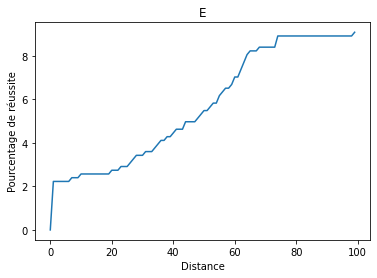

Pourcentage maximum :  9.075342465753424
Distance pour le pourcentage maximum :  99


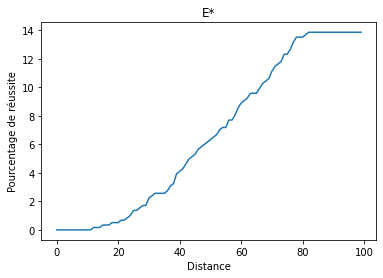

Pourcentage maximum :  13.86986301369863
Distance pour le pourcentage maximum :  82


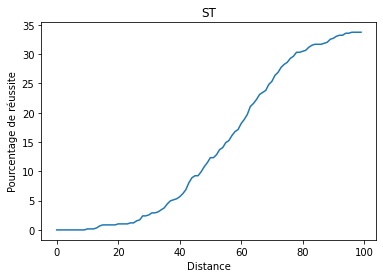

Pourcentage maximum :  33.73287671232877
Distance pour le pourcentage maximum :  96


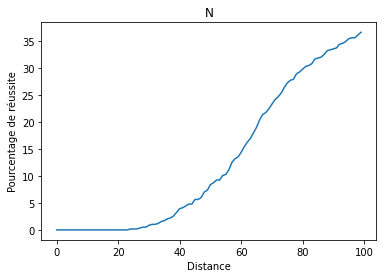

Pourcentage maximum :  36.64383561643836
Distance pour le pourcentage maximum :  99


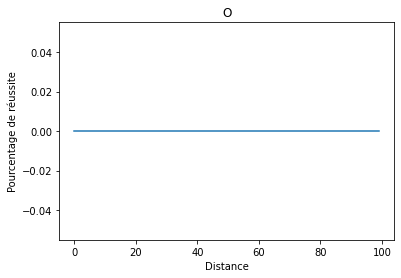

Pourcentage maximum :  0.0
Distance pour le pourcentage maximum :  0


In [ ]:
from pylab import *

possibilite=["E","E*","ST","N","O"]
for element in possibilite: 
  res=[]
  #distance et pourcentage de reussite pour chaque element 
  resu=[]
  distance=0
  for i in range(100): 
    count=0
    calcul=0
    for i in df['Text Fragments A']:
      count=count+1
      Distance=int(levenshtein_ratio_and_distance(df['Text Fragments A'][count],df['Text Fragments B'][count]))
      if Distance < distance :
         if (element ==annotation(df['Text Fragments A'][count])):
           calcul=calcul+1
    resultat=calcul*100/len(df['Text Fragments A'])
    resu.append(resultat)
    distance=distance+1
  #graohe pour chaque element
  tab=[]
  for i in range(100):
    tab.append(i)

  y = array(resu)
  x = array(tab)
  ylabel("Pourcentage de réussite")
  xlabel("Distance")
  title(element)
  plot(x, y)

  show()

  print("Pourcentage maximum : ", max(resu))
  print( "Distance pour le pourcentage maximum : ",resu.index(max(resu)))



Ratio

---



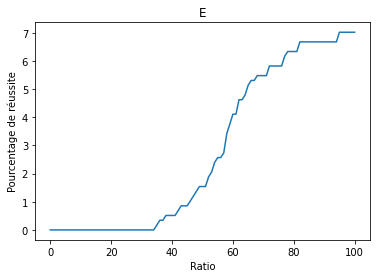

Pourcentage maximum :  7.02054794520548
Ratio pour le pourcentage maximum :  95


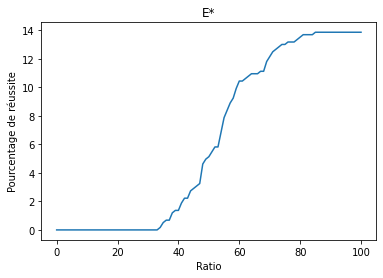

Pourcentage maximum :  13.86986301369863
Ratio pour le pourcentage maximum :  85


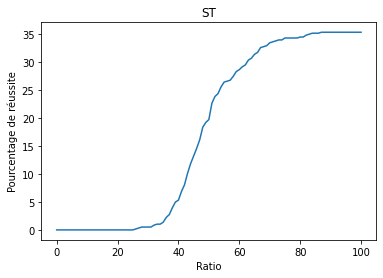

Pourcentage maximum :  35.273972602739725
Ratio pour le pourcentage maximum :  87


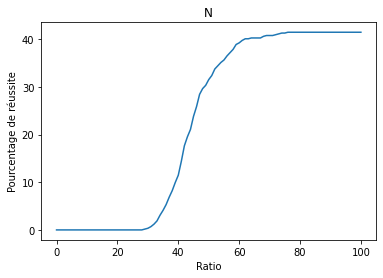

Pourcentage maximum :  41.43835616438356
Ratio pour le pourcentage maximum :  76


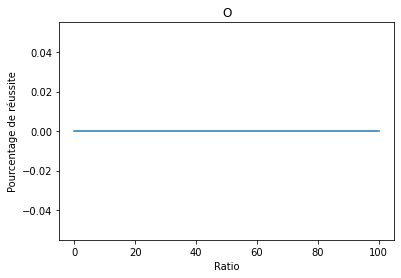

Pourcentage maximum :  0.0
Ratio pour le pourcentage maximum :  0


In [ ]:
from pylab import *

possibilite=["E","E*","ST","N"]
for element in possibilite: 
  res=[]
  #distance et pourcentage de reussite pour chaque element 
  resu=[]
  ratio=0
  for i in range(101): 
    count=0
    calcul=0
    for i in df['Text Fragments A']:
      count=count+1
      Ratio=levenshtein_ratio_and_distance(df['Text Fragments A'][count],df['Text Fragments B'][count],ratio_calc=True)*100
      if Ratio < ratio :
         if (element ==annotation(df['Text Fragments A'][count])):
           calcul=calcul+1
    resultat=calcul*100/len(df['Text Fragments A'])
    resu.append(resultat)
    ratio=ratio+1
  #graohe pour chaque element
  tab=[]
  for i in range(101):
    tab.append(i)

  y = array(resu)
  x = array(tab)
  ylabel("Pourcentage de réussite")
  xlabel("Ratio")
  title(element)
  plot(x, y)

  show()

  print("Pourcentage maximum : ", max(resu))
  print( "Ratio pour le pourcentage maximum : ",resu.index(max(resu)))






## Programme final

Matrice de confusion 



---
Inspiré du programme 4 mais un seul résultat




In [12]:
def programmefinal(a,b): 
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  auteur1=auteur(a)
  auteur2=auteur(b)
  Distanceauteur=levenshtein_ratio_and_distance(auteur1,auteur2)
  Ratioauteur=levenshtein_ratio_and_distance(auteur1,auteur2,ratio_calc=True)
  DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
  RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  Etoile=0
  Nature=0
  ST=0
  res=[]
  if (int(Distance) == 0) and (int(Ratio) == 1) or Distance<10 : 
    if (int(Distanceauteur) == 0) and (int(Ratioauteur) == 1) or Distance<10 :
      res.append("E")
  #partie non sure 
  else : 
    if RNP <0.40: 
      Nature=Nature+1
      Etoile=Etoile+1
    if RNP>0.8:
      ST=ST+1
    if LCS>55:
      Nature=Nature+1
    if Jaccard>0.8:
      Nature=Nature+1
      ST=ST+1
    if int(DNP)>45:
      Nature=Nature+1
    if LCS >=40 and LCS <= 50:
     Etoile=Etoile+1
     Nature=Nature+1
    if LCS <40:
       ST=ST+1
    if int(Distance) <60:
      Etoile=Etoile+1
      ST=ST+1
    if RNP > Ratio : 
       ST=ST+1
    if Ratio>0.8:
      ST=ST+1
    if Ratio>0.45 and Ratio <0.6:
      Nature=Nature+1
    if Nature > Etoile and Nature > ST and ST > Etoile: 
      res.append("N")
    if Etoile > Nature and Etoile > ST  : 
      res.append("E*")
    if ST > Etoile and ST> Nature  : 
     res.append("ST")
    if ST == Etoile :  
       res.append("ST")
    if Nature ==ST : 
       res.append("N")
    if Etoile ==Nature: 
      res.append("N")
    if len(res) == 0 : 
      res.append('ST')
  #print("le bon résultat est : ",annotation(a))
  if res.count('E')==0 and res.count('ST')> res.count('E*') or res.count('ST')> res.count('N'):
    res[0]=="ST"
  if res.count('E')==0 and res.count('N')>res.count('ST') or res.count('N')>res.count('E*'):
    res[0]=="N"
  return res[0]
  

In [51]:
programmefinal(df['Text Fragments A'][1],df['Text Fragments B'][1])

le bon résultat est :  E


'E'

In [15]:
import pandas as pd

count=0
calcul=0
resultat=[]
realite=[]

for i in df['Text Fragments A']:
  count=count+1
  resultat.append(programmefinal(df['Text Fragments A'][count],df['Text Fragments B'][count]))
  realite.append(annotation(df['Text Fragments A'][count]))
  calcul=calcul+1

y_actu = pd.Series(resultat, name='Actual')
y_pred = pd.Series(realite, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)




In [16]:
print(df_confusion)

Predicted   E  E*    N   ST
Actual                     
E          15   0    0    1
E*          0   5    0    2
N          10   8   38   31
ST         29  68  204  172


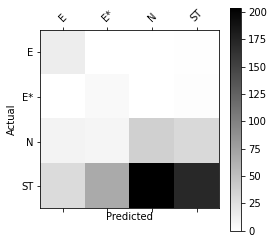

In [17]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

precision: [0.27777778 0.0617284  0.15702479 0.83495146 0.        ]
recall: [0.9375     0.71428571 0.43678161 0.3628692  0.        ]
fscore: [0.42857143 0.11363636 0.23100304 0.50588235 0.        ]
support: [ 16   7  87 474   0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


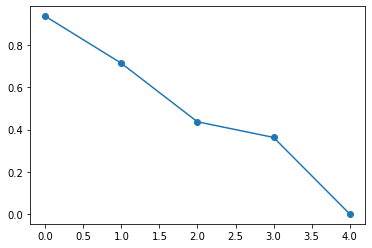

In [22]:

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(resultat, realite)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


plt.plot(recall,"o-")


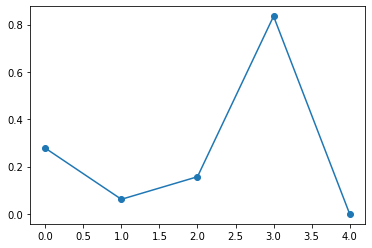

In [23]:
plt.plot(precision,"o-")

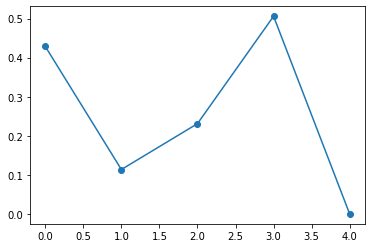

In [24]:
plt.plot(fscore,"o-")

Performance temps de calcul

---



Temps de calcul entre 1H30 et 1h45




# Partie 2-  Sur les données Clef

## Téléchargement des données

1) Importation des modules

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np 

2) Chargement du disque, connexion au répertoire

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
my_local_drive="/content/gdrive/MyDrive/v1"
sys.path.append(my_local_drive)
%cd $my_local_drive
! ls

/content/gdrive/MyDrive/v1
dev	 iclaims.queries  namess  train.tsv    tweets-train-dev.tsv   vclaims
dev.tsv  names		  train   transcripts  tweets-train-dev.xlsx


3.1) Enregistrement des claims

In [4]:
##columns=['Tweet Id','Username','Timestamp','Followers','Friends','Retweets','Favorites','Entities','Sentiment','Mentions','HashTags','URLs']
dir="vclaims"
if os.path.isdir(dir):
  print(dir)
  i=0
  for file in os.listdir(dir):
    if i==0:
      claims=pd.read_json(dir+"/"+file,typ='dictionary')
      i+=1
    else:
      claims=claims.append(pd.read_json(dir+"/"+file,typ='dictionary'))
   # print(file)
display(claims.head())

vclaims


title        In Wake of Election, Obama Passes Executive Or...
subtitle     A story that the President is banning all fake...
author                                                Dan Evon
date                                          29 November 2016
vclaim_id    vclaim-sno-in-wake-of-election-obama-passes-ex...
dtype: object

In [ ]:
claims.size
display(claims["vclaim"])

vclaim    President Barack Obama signed an executive ord...
vclaim    Donald Trump's son Eric said that Hispanic peo...
vclaim    A photograph shows a man holding a 13-pound bu...
vclaim    Actor Samuel L. Jackson tweeted a lament about...
vclaim    An Elgin, Illinois man simultaneously impregna...
                                ...                        
vclaim    Photographs depict then-model Melania Trump (n...
vclaim    U.S. President Donald Trump brandished his mid...
vclaim    A Colorado school's female students were force...
vclaim    Photographs show watermelons that have been gr...
vclaim    A Royal Caribbean vessel fired upon and sank a...
Length: 13825, dtype: object

3.2) Enregistrement des Tweets

In [5]:
columns=["id","text"]
tweets=pd.read_csv('tweets-train-dev.tsv', sep='\t',names=columns) ## On ajoute l'optiokn pour supprimer les mauvaises lignes
display(tweets.head())

,id,text
0,tweet-sno-0,How are butterflies surviving the #AustralianF...
1,tweet-sno-1,Trump needs to immediately divest from his bus...
2,tweet-sno-2,A number of fraudulent text messages informing...
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...


In [ ]:
display(claims["vclaim"].size)
display(tweets.size)

13825

2392

In [ ]:
tweets["text"]

0       How are butterflies surviving the #AustralianF...
1       Trump needs to immediately divest from his bus...
2       A number of fraudulent text messages informing...
3       Fact check: The U.S. Army is NOT contacting an...
4       The US drone attack on #Soleimani caught on ca...
                              ...                        
1191    You got us, there’s no Eggplant condom! But wh...
1192    A bit of rain and Eid and the roads run red wi...
1193    @andersoncooper@HillaryClinton why did WABC NY...
1194    As a medical doctor of course I support vaccin...
1195    Is Chanel No.5 being discontinued?! https://t....
Name: text, Length: 1196, dtype: object

## Analyse Syntaxique

In [ ]:
claims["vclaim"][66]

"A letter from California authorities warns that residents who receive state assistance benefits will no longer be eligible for them if they don't get tested for COVID-19; further, if parents test positive, children in their household who test negative will be placed in temporary foster care until their parents/guardians recover."

In [ ]:
tweets["text"][2]

'A number of fraudulent text messages informing individuals they have been selected for a military draft have circulated throughout the country this week.'

### Création méthode

Création d'une méthode qui récupère la date d'un claim

---



In [32]:
#pour claim : modifier une date en séparant chaque année mois et jour
def dateclaim(a):
 #couper toutes les parties en caractèere pour keyword il faut mettre virgule et pour text espace 
  a= a.split()
  for i in a:
   return a
  if len(a)==0:
    a=['None','None','None']
    return a

In [ ]:
dateclaim(claims["date"][25])

['None', 'None', 'None']

Création d'une méthode qui récupère la date d'un tweet

---



In [27]:
def datetweet(a):
  compter=0
  mois=["January","February","March","April","May","June","July","August","September","October","November","December"]
  a= a.split()
  b=[]
  for x in a :
    if x.isdigit():
      if len(x) <2 :
          b.append(x)
  if len(b)==0:
      b.append('NULL')
  for x in a : 
      if x in mois: 
        b.append(x)
  if len(b)==1:
      b.append('NULL')

  for x in a : 
    if x.isdigit():
      if len(x) ==4:
          b.append(x)
  if len(b)==2:
      b.append('NULL')
 
  return b
      

In [ ]:
datetweet(tweets["text"][109])

['NULL', 'June', '2019']

Création d'une méthode qui permet de déterminer la date d'un claim

---



In [28]:
def lieclaim(a):
  count=-1
  for i in claims: 
    count=count+1
    if claims["vclaim"][count] == a :
      return claims["date"][count]

In [ ]:
lieclaim(claims["vclaim"][1])

'24 May 2016'

In [ ]:
dateclaim(lieclaim(claims["vclaim"][1]))

['24', 'May', '2016']

Création d'une mthode qui récupère les Noms Propres (en majuscule)

---



In [35]:
def NomPropres(a):
  compter=0
  mois=["January","February","March","April","May","June","July","August","September","October","November","December"]
 
  a= a.split()
  b=[]
  for x in a : 
      if x[0].isupper(): 
        b.append(x)
      #j'enleve le mois
      if x in mois:
        b.remove(x)
  return b

In [ ]:
NomPropres(tweets["text"][3])

['Fact',
 'The',
 'U.S.',
 'Army',
 'NOT',
 'If',
 'U.S.',
 'Army',
 'U.S.',
 'Army',
 'CGSC']

In [ ]:
NomPropres(claims["vclaim"][46])

['U.S.', 'President', 'Bill', 'Clinton', 'U.S.', 'Senate']

In [ ]:
claims["date"]

date    29 November 2016
date         24 May 2016
date         26 May 2017
date          3 May 2018
date    19 December 2018
              ...       
date         23 May 2016
date     23 October 2019
date     3 February 2016
date      20 August 2007
date        21 July 2017
Length: 13825, dtype: object

### Application fonctions sur les données claims /tweets

Application de Levenshtein sur toutes les données

---



In [ ]:
count=0
for i in tweets["text"]:
  s1=modif(tweets["text"][1])
  count=count+1
  s2=modif(claims["vclaim"][count])
  Distance=levenshtein_ratio_and_distance(s1,s2)
  Ratio=levenshtein_ratio_and_distance(s1,s2,ratio_calc=True)
  print(count,Ratio,Distance)

1 0.27167630057803466 231
2 0.1901840490797546 247
3 0.30851063829787234 223
4 0.2981029810298103 227
5 0.205607476635514 244
6 0.27450980392156865 228
7 0.3163265306122449 221
8 0.28895184135977336 229
9 0.26301369863013696 231
10 0.26666666666666666 233
11 0.33980582524271846 214
12 0.3225806451612903 216
13 0.2958904109589041 225
14 0.19937694704049844 245
15 0.27011494252873564 231
16 0.281767955801105 228
17 0.2770083102493075 229
18 0.34606741573033706 215
19 0.2647887323943662 235
20 0.33890214797136037 216
21 0.39201451905626133 227
22 0.24188790560471976 238
23 0.32904884318766064 218
24 0.2809917355371901 230
25 0.27548209366391185 232
26 0.22941176470588234 239
27 0.3253333333333333 219
28 0.28493150684931506 227
29 0.29081632653061223 227
30 0.31958762886597936 220
31 0.3092269326683292 219
32 0.2880886426592798 229
33 0.2909090909090909 224
34 0.29859154929577464 226
35 0.2621082621082621 232
36 0.2849462365591398 228
37 0.2768361581920904 231
38 0.27298050139275765 230
39

Application de Jaccard sur toutes les données

---



In [25]:
modif(tweets["text"][1])

'Trump needs immediately divest from businesses comply emoluments clause. Iran could threaten Trump hotels *worldwide* could provoke war over loss revenue from skittish guests.  His business interests should be driving military decisions. — Ilhan Omar (@IlhanMN) January 6, 2020'

In [20]:
claims["vclaim"][302]

'A commencement speech delivered by President Trump at Liberty University in May 2017 bore remarkable similarities to one given by Reese Witherspoon\'s character in the 2001 film "Legally Blonde."'

In [49]:
claims["vclaim"][690]

'U.S. President Donald Trump said "We\'re going to take the firearms first and then go to court."'

In [23]:
count=0
for i in tweets["text"]:
  s1=tweets["text"][1]
  s1=modif(s1)
  count=count+1
  s2=claims["vclaim"][count]
  s2=modif(s2)
  if jaccard(s1, s2)* 100 > 68.1:
      print(count)

215
608
622
668
889


### Programmes

Essaie d'un premier programme

---



1.   Supprime tous les elements inutiles tels que article determminant etc avec methode modif()
2.  On ajoute 5 points si annee correspondent, 10 si mois correspondent, 15 si jour aussi 


1.   On ajoute 20 si il y a une correspondance de 50% des NomsPropres
2.   On ajoute 50 points si levenshtein distance > 30 et ratio > 60%





In [36]:
def calcul1(a,b):
  datet=datetweet(a)
  datec=lieclaim(b)
  datec=dateclaim(datec)
  total=0
  count=-1
  count =count+1
  res=[]
  if datec == None: 
    datec = ['','','']
  if datec[2]==datet[2]:
    total=total+5
    if datec[1]==datet[1]:
      total=total+15
      if datec[0]==datet[0]:
       total=total+20
  for x in NomPropres(a):
    if x in NomPropres(b):
      res.append(x)
  if len(res) > 1:
    total=total+20
  if jaccard(a,b)*100 > 68 :
    total=total+10
  a=modif(a)
  b=modif(b)
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True) 
  Ratio=Ratio * 100
  Distance=levenshtein_ratio_and_distance(a,b,ratio_calc=False)
  if int(Distance) > 25 and int(Ratio) > 2: 
    total=total+10
  return total
  


In [44]:
#calcul pour claim 1 et tweet 1 

calcul1(tweets["text"][1],claims["vclaim"][520])

10

In [46]:
count=0
for i in tweets["text"]:
  s1=tweets["text"][1]
  count=count+1
  s2=claims["vclaim"][count]
  if calcul1(s1, s2) > 40 :
      print(count)

215
690


### Programme inspiré des travaux sur les premieres données



In [ ]:
count=0
for i in tweets["text"]:
  a=tweets["text"][1]
  count=count+1
  b=claims["vclaim"][count]
  Distance=int(levenshtein_ratio_and_distance(a,b))
  Ratio=levenshtein_ratio_and_distance(a,b,ratio_calc=True)
  LCS=lcs(a,b)
  Jaccard=jaccard(modif(a),modif(b))
  Etoile=0
  Nature=0
  ST=0
  res=[]
  if len(NomsPropres(claims["vclaim"][count])) > 0 :
    DNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b))
    RNP=levenshtein_ratio_and_distance(NomsPropres(a),NomsPropres(b),ratio_calc=True)
    if RNP > Ratio : 
       ST=ST+1
  if (int(Distance) == 0) and (int(Ratio) == 1) : 
      print(count)
  #partie non sure 
  else : 
    if Distance > 60: 
      Nature=Nature+1
    if LCS >=40 and LCS <= 50:
     Etoile=Etoile+1
     Nature=Nature+1
    if LCS <20:
       ST=ST+2
    if Distance <60:
      Etoile=Etoile+1
      ST=ST+1
    if Nature > Etoile and Nature > ST and ST > Etoile: 
      print(count)
    if Etoile > Nature and Etoile > ST  : 
      print(count)
    if ST > Etoile and ST> Nature  : 
      print(count)
    if ST == Etoile and ST == Nature and Etoile ==Nature: 
        print(count)
    if len(res) == 0 : 
      res.append('AUCUN RESULTAT')
  #print("le bon résultat est : ",annotation(a))

  


974


### Filtrage

---



Pour les claims et tweets filtrer par date (programme plus haut) et Noms Propres communs (mot en majuscule en enlevant les mois voir programme plus haut)


FILTRE PAR DATE 

---

//Exemple : tweet 1 

In [ ]:
(dateclaim(lieclaim(claims["vclaim"][24]))[2])

'2012'

In [ ]:
count=0
print("Tweet 1 : ",tweets["text"][1])
for i in tweets["text"]:
  count=count+1
  if (dateclaim(lieclaim(claims["vclaim"][count]))[2]) == (datetweet(tweets["text"][1])[2]):
    if (dateclaim(lieclaim(claims["vclaim"][count]))[1]) == (datetweet(tweets["text"][1])[1]):
      print(count,claims["vclaim"][count])
                                        

Tweet 1 :  Trump needs to immediately divest from his businesses and comply with the emoluments clause. Iran could threaten Trump hotels *worldwide* and he could provoke war over the loss of revenue from skittish guests.  His business interests should not be driving military decisions. — Ilhan Omar (@IlhanMN) January 6, 2020
46 U.S. President Bill Clinton was forced to testify at his 1999 U.S. Senate impeachment trial.
215 In January 2020, U.S. Rep. Ilhan Omar advised Iran to attack Trump-branded hotels in the world, thus committing treason.
331 The fictional "Umbrella Corporation" from the game "Resident Evil" shares a logo with a biotech lab in Wuhan, Hubei Province in China, where a new coronavirus is believed to have originated.
374 Kobe Bryant once said a president "Whose name alone creates division and anger. Whose words inspire dissension and hatred can't possibly 'Make America Great Again.'"
387 At least 23 people were killed at a Jan. 20, 2020 Second Amendment rally in Richmon

> Donc pour le tweet 1 on a plusieurs claims qui correspondent à la même date (année, mois)

Filtre Noms Propres

---



In [ ]:
count=0
print("Tweet 1 : ",tweets["text"][1])
for i in tweets["text"]:
  count=count+1
  a=0

  for element in NomPropres(tweets["text"][1]):
    if element in NomPropres(claims["vclaim"][count]):
       a=a+1
  if len(NomPropres(tweets["text"][1]))/2 <= a:
      print(count,claims["vclaim"][count])

Tweet 1 :  Trump needs to immediately divest from his businesses and comply with the emoluments clause. Iran could threaten Trump hotels *worldwide* and he could provoke war over the loss of revenue from skittish guests.  His business interests should not be driving military decisions. — Ilhan Omar (@IlhanMN) January 6, 2020
215 In January 2020, U.S. Rep. Ilhan Omar advised Iran to attack Trump-branded hotels in the world, thus committing treason.


>Après avoir récupérer les Noms Propres du Tweet et les Noms Propres de chaque claim on a comparé si il y avait au moins la moitié des claims qui ont les mêmes Noms propres que le Tweet.
>on a donc par exemple pour le Tweet 1 récupérer (Trump,Iran,Trump,Illan,Omar) que l'on a comparé avec chaque claim et le résultat a donée que la claim 215 avait la moitié ou plus de la moitié des Noms Propres 